In [10]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp
import ast

FBPINNs parameters

In [11]:
# set noise_level to 0.005 or 0.05
noise_level = 0.05

root_dir = f"Noise_{noise_level}"

# Verify directory exists
if not os.path.exists(root_dir):
    print(f"Directory does not exist: {root_dir}")
else:
    print(f"Directory exists: {root_dir}")
    metrics_files = [f for f in os.listdir(root_dir) if "parameters" in f and "FBPINN" in f]

    print(metrics_files)
    # convert metrics files to dataframes
    metrics_dfs = [pd.read_csv(f"{root_dir}/{f}") for f in metrics_files]
    metrics_dfs[0].head()
    
df = metrics_dfs[0] 
def parse_params(param_string):
    return [float(x) for x in param_string.strip('[]').split()]

# to list
df['true_params'] = df['true_params'].apply(parse_params)
df['learned_params'] = df['learned_params'].apply(parse_params)

Directory exists: Noise_0.05
['FBPINN_combined_parameters.csv']


In [12]:
df 

,tag,model_type,time_limit,true_params,learned_params
0,FBPINN,sg,0-10,[1.0],[0.9915]
1,FBPINN,sg,10-24,[1.0],[0.9995]
2,FBPINN,sg,0-24,[1.0],[0.9917]
3,FBPINN,coexistence,0-10,"[0.5, 0.7, 0.3, 0.3, 0.6]","[0.59, 0.6991, 0.3004, 0.2486, 0.662]"
4,FBPINN,coexistence,10-24,"[0.5, 0.7, 0.3, 0.3, 0.6]","[0.3266, 0.4222, 0.513, 0.0313, 0.809]"
5,FBPINN,coexistence,0-24,"[0.5, 0.7, 0.3, 0.3, 0.6]","[0.4728, 0.7313, 0.2746, 0.2969, 0.6058]"
6,FBPINN,survival,0-10,"[0.5, 0.3, 0.6, 0.7, 0.3]","[0.3761, 0.3016, 0.5902, 0.8316, 0.1883]"
7,FBPINN,survival,10-24,"[0.5, 0.3, 0.6, 0.7, 0.3]","[0.5675, 0.3002, 0.3444, 0.615, 0.0271]"
8,FBPINN,survival,0-24,"[0.5, 0.3, 0.6, 0.7, 0.3]","[0.0841, 0.3005, 0.5957, 2.2219, 0.0317]"


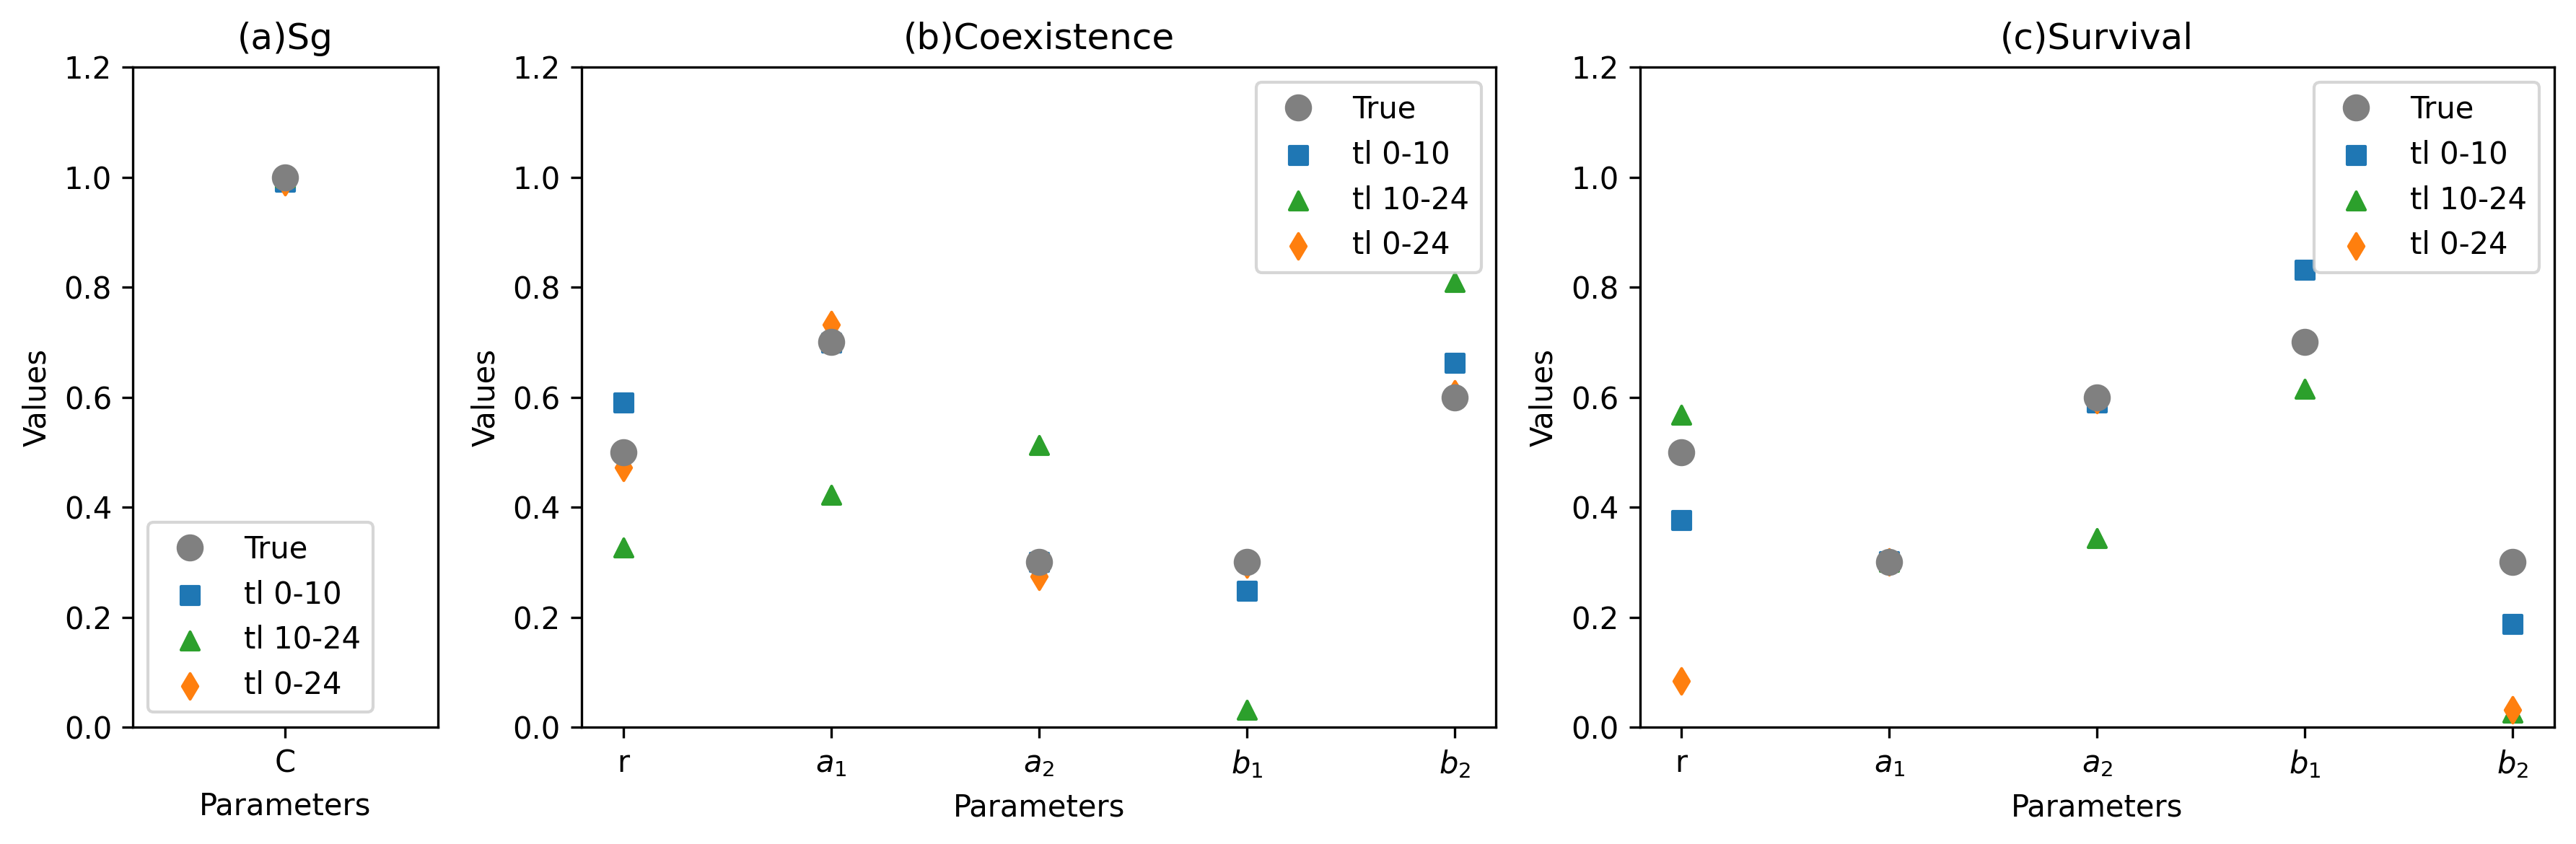

In [13]:
df = metrics_dfs[0]

fig, axs = plt.subplots(1, 3, figsize=(12, 4), dpi=300, gridspec_kw={'width_ratios': [1, 3, 3]})

model_types = ['sg', 'coexistence', 'survival']
markers = ['s', '^', 'd'] 
indices = {
    'sg': ['C'],
    'coexistence': ['r', '$a_{1}$', '$a_{2}$', '$b_{1}$', '$b_{2}$'],
    'survival': ['r', '$a_{1}$', '$a_{2}$', '$b_{1}$', '$b_{2}$']
}
markers = ['s', '^', 'd']  

color_map = {
    '0-10': 'tab:blue',
    '10-24': 'tab:green',
    '0-24': 'tab:orange'
}

fig_title_label = ['(a)', '(b)', '(c)']

# Plotting
for ax, model in zip(axs, model_types):
    model_df = df[df['model_type'] == model]
    param_labels = indices[model]
    unique_times = model_df['time_limit'].unique()

    # Plot 
    true_params = model_df['true_params'].iloc[0]  
    ax.plot(param_labels, true_params, 'o', color='gray', label='True', markersize=8)
    
    for time_interval in unique_times:
        subset = model_df[model_df['time_limit'] == time_interval]
        color = color_map[time_interval]
        marker = markers[list(unique_times).index(time_interval) % len(markers)]

        for i, row in subset.iterrows():
            learned_params = row['learned_params']
            first_param = True  # Only label the first parameter

            for j, param in enumerate(learned_params):
                label = f'tl {time_interval}' if first_param else None
                ax.scatter(param_labels[j], param, color=color, marker=marker, label=label)
                first_param = False

    ax.set_title(f'{fig_title_label[model_types.index(model)]}{model.capitalize()}')
    ax.set_xlabel('Parameters')
    ax.set_ylabel('Values')
    # set y lower limit to 0
    ax.set_ylim(bottom=0)
    # set y upper limit to max in (true_params, learned_params)
    max_y = max([max(df['true_params'].max()), max(df['learned_params'].max())]) +0.2
    ax.set_ylim(top=max_y)
    ax.legend()

plt.tight_layout()
# save figure
plt.savefig(f"FBPINNs_learned_parameters_{noise_level}.png")


SciANN Parameters

In [14]:
# Verify directory exists
if not os.path.exists(root_dir):
    print(f"Directory does not exist: {root_dir}")
else:
    print(f"Directory exists: {root_dir}")
    metrics_files = [f for f in os.listdir(root_dir) if "params" in f and "SciANN" in f]

    print(metrics_files)
    # convert metrics files to dataframes
    metrics_dfs = [pd.read_csv(f"{root_dir}/{f}") for f in metrics_files]
    metrics_dfs[0].head()
    
df = metrics_dfs[0] 
def parse_params(param_string):
    return [float(x) for x in param_string.strip('[]').split()]

# to list
df['true_params'] = df['true_params'].apply(parse_params)
df['learned_params'] = df['learned_params'].apply(parse_params)

Directory exists: Noise_0.05
['SciANN_combined_params.csv']


In [15]:
# order the df["time_limit"] by [0,10], [10,24], [0,24]
# df['time_limit'] = df['time_limit'].apply(lambda x: '0-10' if x == '[0, 10]' else '10-24' if x == '[10, 24]' else '0-24')
df

,tag,model_type,time_limit,true_params,learned_params
0,SciANN,sg,0-10,[1.0],[0.9916]
1,SciANN,sg,0-24,[1.0],[1.0042]
2,SciANN,sg,10-24,[1.0],[1.0097]
3,SciANN,coexistence,0-10,"[0.5, 0.7, 0.3, 0.3, 0.6]","[0.1268, 0.6594, 0.3439, 0.2504, 0.5629]"
4,SciANN,coexistence,0-24,"[0.5, 0.7, 0.3, 0.3, 0.6]","[0.1981, 0.669, 0.3287, -0.0, 0.8282]"
5,SciANN,coexistence,10-24,"[0.5, 0.7, 0.3, 0.3, 0.6]","[0.3792, 0.3122, 0.5978, -0.0, 0.8287]"
6,SciANN,survival,0-10,"[0.5, 0.3, 0.6, 0.7, 0.3]","[0.3381, 0.3033, 0.5742, 0.9362, -0.0]"
7,SciANN,survival,0-24,"[0.5, 0.3, 0.6, 0.7, 0.3]","[0.3088, 0.3013, 0.5592, 0.9269, 0.0364]"
8,SciANN,survival,10-24,"[0.5, 0.3, 0.6, 0.7, 0.3]","[0.5132, 0.3007, 0.1046, 0.4409, 0.803]"


In [16]:
df

,tag,model_type,time_limit,true_params,learned_params
0,SciANN,sg,0-10,[1.0],[0.9916]
1,SciANN,sg,0-24,[1.0],[1.0042]
2,SciANN,sg,10-24,[1.0],[1.0097]
3,SciANN,coexistence,0-10,"[0.5, 0.7, 0.3, 0.3, 0.6]","[0.1268, 0.6594, 0.3439, 0.2504, 0.5629]"
4,SciANN,coexistence,0-24,"[0.5, 0.7, 0.3, 0.3, 0.6]","[0.1981, 0.669, 0.3287, -0.0, 0.8282]"
5,SciANN,coexistence,10-24,"[0.5, 0.7, 0.3, 0.3, 0.6]","[0.3792, 0.3122, 0.5978, -0.0, 0.8287]"
6,SciANN,survival,0-10,"[0.5, 0.3, 0.6, 0.7, 0.3]","[0.3381, 0.3033, 0.5742, 0.9362, -0.0]"
7,SciANN,survival,0-24,"[0.5, 0.3, 0.6, 0.7, 0.3]","[0.3088, 0.3013, 0.5592, 0.9269, 0.0364]"
8,SciANN,survival,10-24,"[0.5, 0.3, 0.6, 0.7, 0.3]","[0.5132, 0.3007, 0.1046, 0.4409, 0.803]"


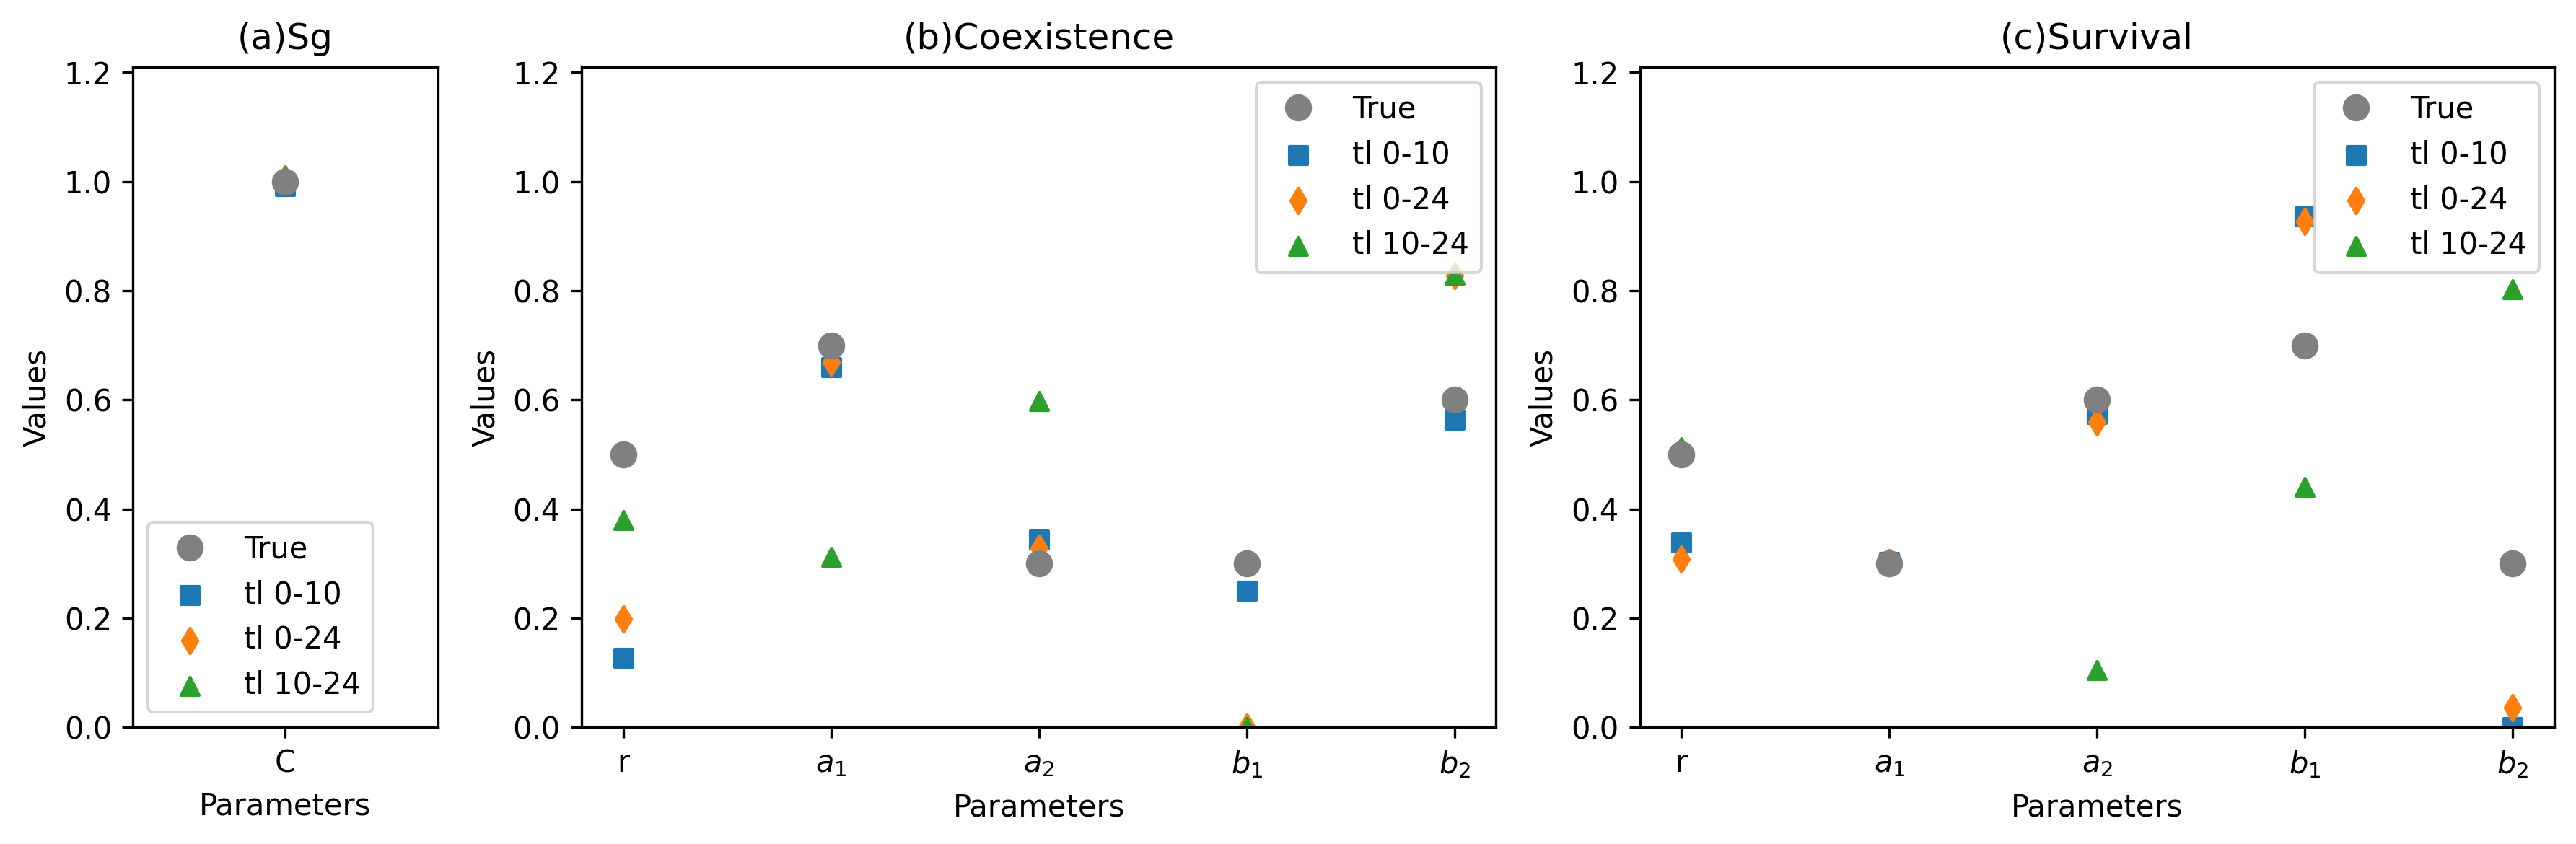

In [17]:
df = metrics_dfs[0]

fig, axs = plt.subplots(1, 3, figsize=(12, 4), dpi=300, gridspec_kw={'width_ratios': [1, 3, 3]})

model_types = ['sg', 'coexistence', 'survival']
markers = ['s', '^', 'd'] 
indices = {
    'sg': ['C'],
    'coexistence': ['r', '$a_{1}$', '$a_{2}$', '$b_{1}$', '$b_{2}$'],
    'survival': ['r', '$a_{1}$', '$a_{2}$', '$b_{1}$', '$b_{2}$']
}
markers = ['s', 'd', '^']  

color_map = {
    '0-10': 'tab:blue',
    '0-24': 'tab:orange',
    '10-24': 'tab:green'  
}
fig_title_label = ['(a)', '(b)', '(c)']

# Plotting
for ax, model in zip(axs, model_types):
    model_df = df[df['model_type'] == model]
    param_labels = indices[model]
    unique_times = model_df['time_limit'].unique()

    # Plot
    true_params = model_df['true_params'].iloc[0]  
    ax.plot(param_labels, true_params, 'o', color='gray', label='True', markersize=8)
    
    for time_interval in unique_times:
        subset = model_df[model_df['time_limit'] == time_interval]
        color = color_map[time_interval]
        marker = markers[list(unique_times).index(time_interval) % len(markers)]

        for i, row in subset.iterrows():
            learned_params = row['learned_params']
            first_param = True  # Only label the first parameter

            for j, param in enumerate(learned_params):
                label = f'tl {time_interval}' if first_param else None
                ax.scatter(param_labels[j], param, color=color, marker=marker, label=label)
                first_param = False

    ax.set_title(f'{fig_title_label[model_types.index(model)]}{model.capitalize()}')
    ax.set_xlabel('Parameters')
    ax.set_ylabel('Values')
    ax.set_ylim(bottom=0)
    # set y upper limit to max in (true_params, learned_params)
    max_y = max([max(df['true_params'].max()), max(df['learned_params'].max())]) +0.2
    ax.set_ylim(top=max_y)
    ax.legend()

plt.tight_layout()
# save figure   
plt.savefig(f"SciANN_learned_parameters_{noise_level}.png")


Compare all three package

In [18]:
# Verify directory exists
if not os.path.exists(root_dir):
    print(f"Directory does not exist: {root_dir}")
else:
    print(f"Directory exists: {root_dir}")
    sciann_files = [f for f in os.listdir(root_dir) if "metrices" in f and "SciANN" in f]
    fbpinn_files = [f for f in os.listdir(root_dir) if "metrices" in f and "FBPINN" in f]
    pysindy_files = [f for f in os.listdir(root_dir) if "metrices" in f and "PySINDy" in f]

    print(sciann_files, fbpinn_files, pysindy_files)
    # convert metrics files to dataframes
    fbpinn_df = [pd.read_csv(f"{root_dir}/{f}") for f in fbpinn_files][0]
    sciann_df = [pd.read_csv(f"{root_dir}/{f}") for f in sciann_files][0]
    pysindy_df = [pd.read_csv(f"{root_dir}/{f}") for f in pysindy_files][0]

fbpinn_df = fbpinn_df.rename(columns={'mse_test': 'MSE'})
sciann_df = sciann_df.rename(columns={'mse_test': 'MSE'})
pysindy_df.rename(columns={'Time_limit': 'time_limit'}, inplace=True)
pysindy_df['time_limit'] = pysindy_df['time_limit'].apply(lambda x: x.replace('[', '').replace(']', '').replace(', ', '-'))

Directory exists: Noise_0.05
['SciANN_combined_metrices.csv'] ['FBPINN_combined_metrices.csv'] ['PySINDy_combined_metrices_coefs_0.05.csv']


In [19]:
print(pysindy_df.head(2))
print(fbpinn_df.head(2))
print(sciann_df.head(2))

       tag   model_type  Noise  Numx time_limit Differentiation Type  \
0  PySINDy  coexistence   0.05   100       0-10                  SFD   
1  PySINDy  coexistence   0.05   100       0-24                  SFD   

        MSE                                       Coefficients  
0  0.004414  {'alpha_1': 0.98, 'alpha_2': -0.0, 'alpha_3': ...  
1  0.004741  {'alpha_1': 0.7, 'alpha_2': -0.0, 'alpha_3': -...  
      tag model_type time_limit   mse_learned       MSE
0  FBPINN         sg       0-10  7.633118e-05  0.000092
1  FBPINN         sg      10-24  3.167589e-07  0.000316
      tag model_type time_limit  mse_learned       MSE
0  SciANN         sg       0-10     0.000074  0.000109
1  SciANN         sg       0-24     0.000018  0.000155


In [20]:
sciann_df['Source'] = 'SciANN'
fbpinn_df['Source'] = 'FBPINN'
pysindy_df['Source'] = 'PySINDy'



In [21]:
combined_df = pd.concat([sciann_df[['model_type', 'time_limit', 'MSE', 'Source']],
                         fbpinn_df[['model_type', 'time_limit', 'MSE', 'Source']],
                         pysindy_df[['model_type', 'time_limit', 'MSE', 'Source']]])
combined_df

,model_type,time_limit,MSE,Source
0,sg,0-10,0.000109,SciANN
1,sg,0-24,0.000155,SciANN
2,sg,10-24,0.010372,SciANN
3,coexistence,0-10,0.002312,SciANN
4,coexistence,0-24,0.000179,SciANN
5,coexistence,10-24,0.008972,SciANN
6,survival,0-10,0.000385,SciANN
7,survival,0-24,0.000157,SciANN
8,survival,10-24,0.073697,SciANN
0,sg,0-10,0.000092,FBPINN


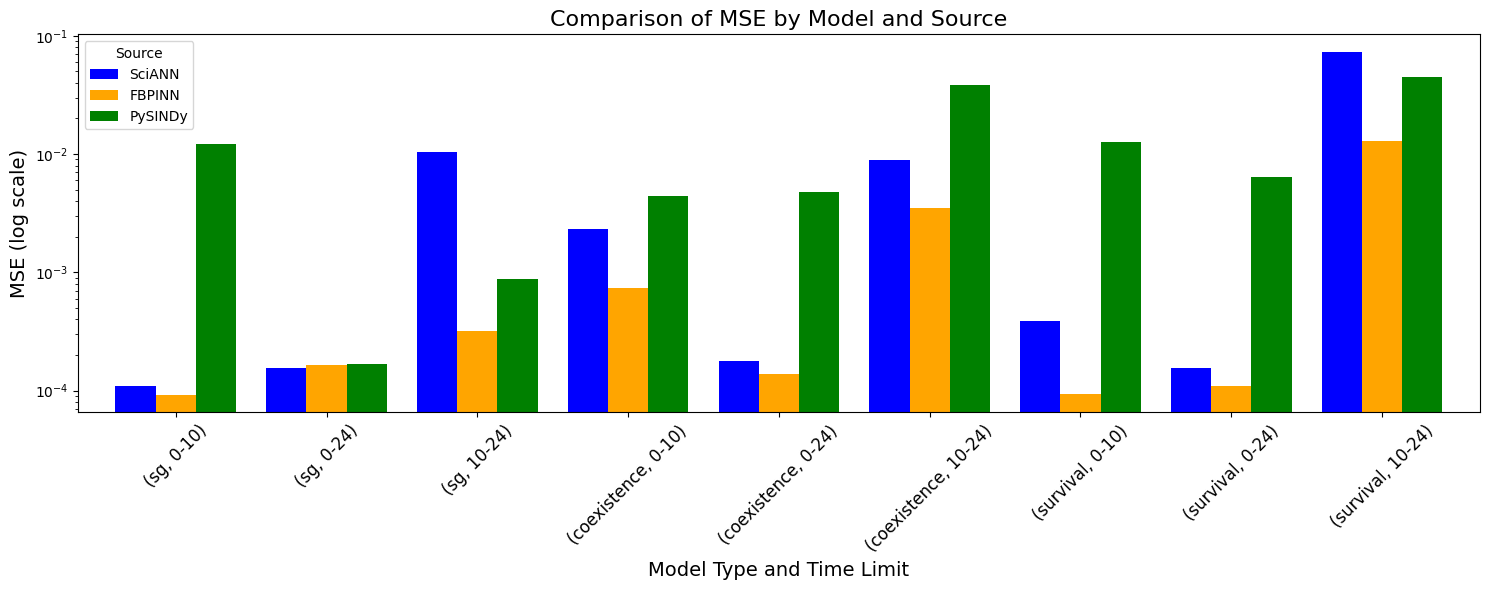

In [22]:
# plot MSE by model and source
fig, ax = plt.subplots(figsize=(15, 6))

pivot_df = combined_df.pivot_table(index=['model_type', 'time_limit'], columns='Source', values='MSE')

# order columns
pivot_df = pivot_df[['SciANN', 'FBPINN', 'PySINDy']] 

# index order
pivot_df = pivot_df.reindex(['sg', 'coexistence', 'survival'], level=0)

# Plot
pivot_df.plot(kind='bar', ax=ax, logy=True, color=['blue', 'orange', 'green'], width=0.8)

ax.set_ylabel('MSE (log scale)', fontsize=14)
ax.set_xlabel('Model Type and Time Limit', fontsize=14)
ax.set_title('Comparison of MSE by Model and Source', fontsize=16)
plt.xticks(rotation=45, fontsize=12)
plt.legend(title='Source')
plt.tight_layout()

# save figure
plt.savefig(f"MSE_comparison_{noise_level}.png")


In [23]:
pivot_df

Source                    SciANN    FBPINN   PySINDy
model_type  time_limit                              
sg          0-10        0.000109  0.000092  0.012199
            0-24        0.000155  0.000166  0.000168
            10-24       0.010372  0.000316  0.000882
coexistence 0-10        0.002312  0.000738  0.004414
            0-24        0.000179  0.000139  0.004741
            10-24       0.008972  0.003495  0.038304
survival    0-10        0.000385  0.000094  0.012666
            0-24        0.000157  0.000110  0.006435
            10-24       0.073697  0.012951  0.044859